# Convolutional Neural Network Architecture

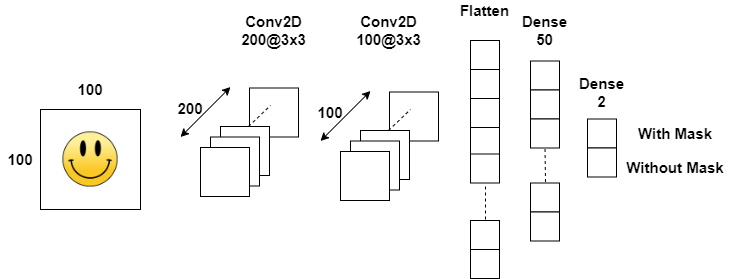

In [17]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

c:\Users\ASTHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [21]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 502ms/step - accuracy: 0.9785 - loss: 0.0483 - val_accuracy: 0.9274 - val_loss: 0.1903
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 504ms/step - accuracy: 0.9565 - loss: 0.0993 - val_accuracy: 0.9234 - val_loss: 0.2196
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 477ms/step - accuracy: 0.9827 - loss: 0.0460 - val_accuracy: 0.9395 - val_loss: 0.1738
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 489ms/step - accuracy: 0.9728 - loss: 0.0708 - val_accuracy: 0.9315 - val_loss: 0.2080
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 478ms/step - accuracy: 0.9805 - loss: 0.0631 - val_accuracy: 0.9395 - val_loss: 0.2142
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.9767 - loss: 0.0660 - val_accuracy: 0.9194 - val_loss: 0.2976
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 477ms/step - accuracy: 0.9709 - loss: 0.0721 - val_accuracy: 0.9476 - val_loss: 0.1655
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 493ms/step - accuracy: 0.9879 - loss: 0.0390 - val_accu

: 

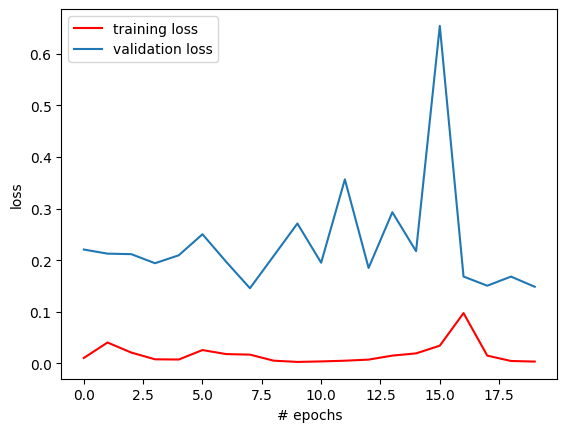

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

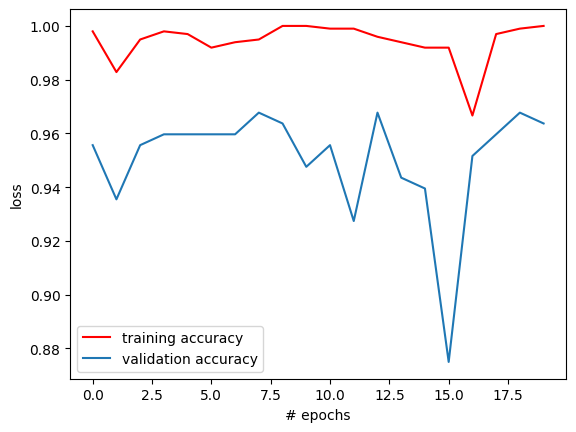

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9714 - loss: 0.1115
[0.1462608128786087, 0.9637681245803833]
